# Урок: Keras

## Задание

Используя набор примеров fashion-MNIST, описать какой результат получен в нейросети в зависимости от:
* числа нейронов в слое(для 2-хслойной сети)
* числа слоев (2, 3, 5, 10) при близких размерах сети (близкое число тренируемых парметров); фиксируйте для тренировочного и тестового набора метрики accuracy
* проверьте работу разных оптимизаторов (SGD, Adam, RMSProp) для одной из моделей п.1; фиксируйте для тренировочного и тестового набора метрики accuracy
* сделайте вывод - что помогло вам улучшить качество классификации в нейросети на тестовом наборе?
* для одного варианта сетей сформируйте матрицу ошибок по классам. Оцените качество модели по каждому классу отдельно (полнота, точность). Сделайте вывод.

## Импорт библиотек

In [63]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from keras.models import Sequential
from keras.layers import Dense
from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical

from sklearn.model_selection import ParameterGrid
from sklearn.metrics import classification_report

## Загрузка данных

In [13]:
(train_imagesi, train_labels), (test_imagesi, test_labels) = fashion_mnist.load_data()

# приведем изображение к диапазону (-1, 1)
train_images = (train_imagesi / 127) - 1
test_images = (test_imagesi / 127) - 1

# делаем векторизацию, т.к. наши слои полносвязные и хотят на вход вектор
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

In [14]:
print(f"Shape: {train_images.shape}")

Shape: (60000, 784)


## Функции

In [28]:
def get_model(name, input_shape, units, layers_num, optimizer):
  model = Sequential(name=name)
  model.add(Dense(units, activation='relu', input_shape=input_shape))

  for k in range(layers_num + 1):
    units_ = 10 + (10 - k) * 10
    model.add(Dense(units_, activation='relu'))

  model.add(Dense(10, activation='softmax'))
  model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )
  return model

In [29]:
def plot(train_loss, test_loss, title):
  plt.figure(figsize=(20,5))
  plt.plot(train_loss, label = 'train loss')
  plt.plot(test_loss, label = 'test loss')
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.legend()
  plt.grid('On')
  plt.title(title)
  plt.show()

## Создание модели и перебор параметров

#1 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'adam', 'units': 64}


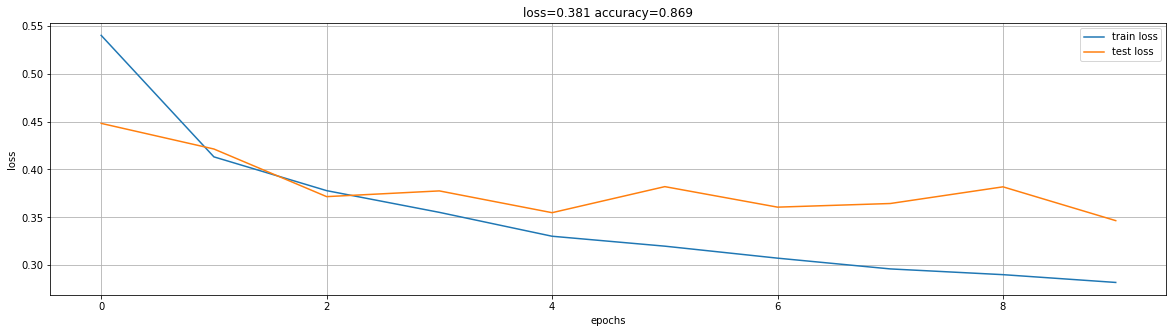

#2 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'adam', 'units': 128}


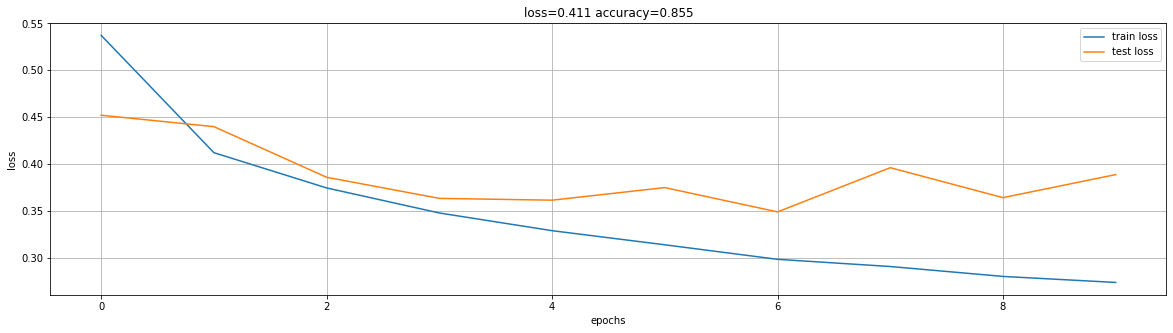

#3 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'sgd', 'units': 64}


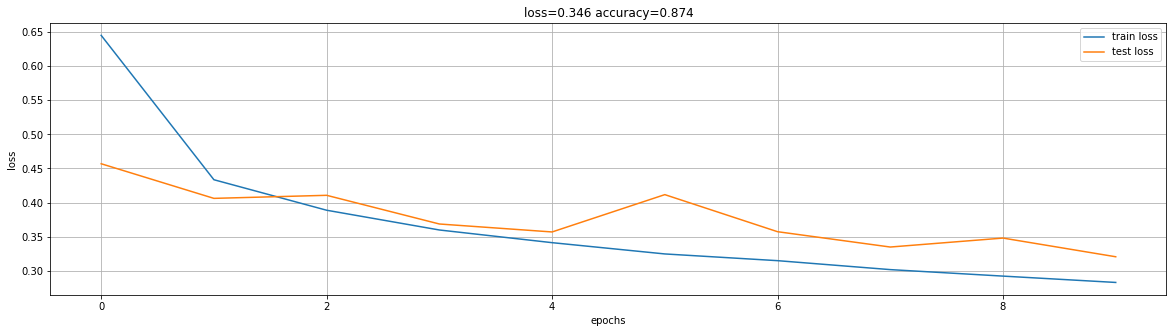

#4 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'sgd', 'units': 128}


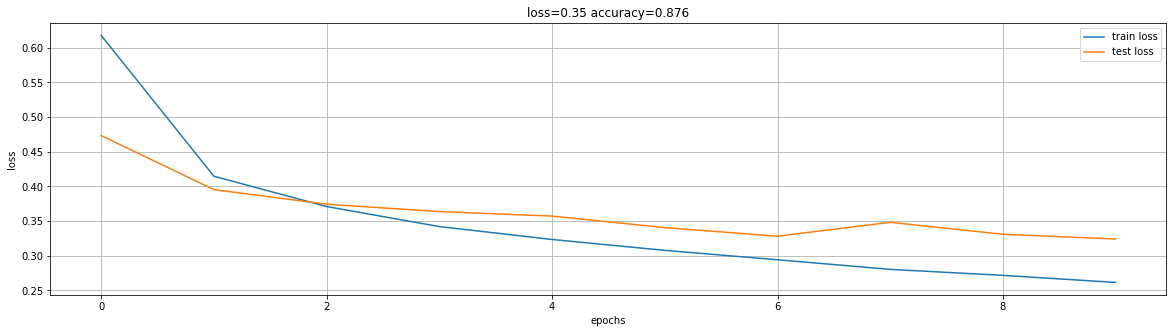

#5 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'rmsprop', 'units': 64}


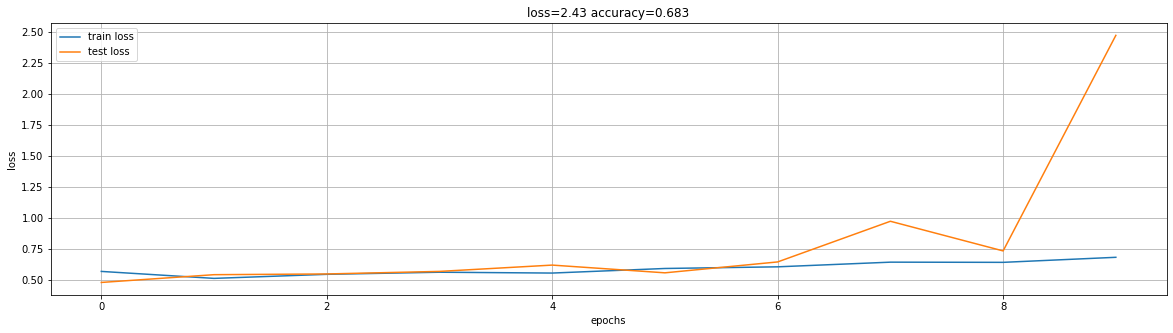

#6 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'rmsprop', 'units': 128}


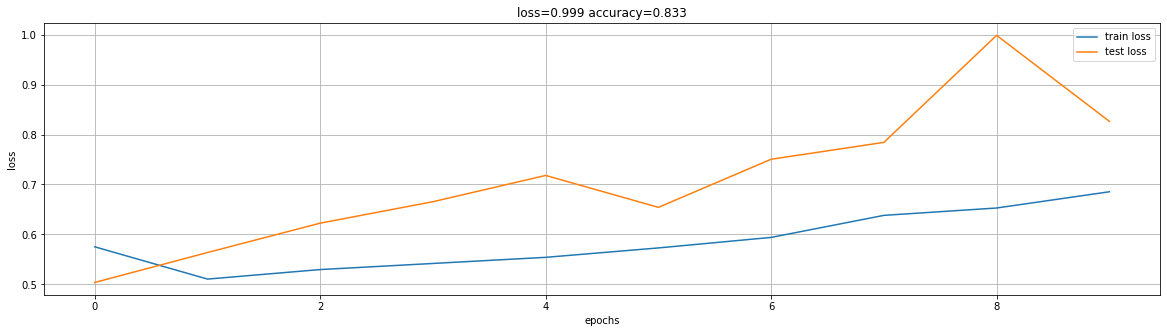

#7 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'adam', 'units': 64}


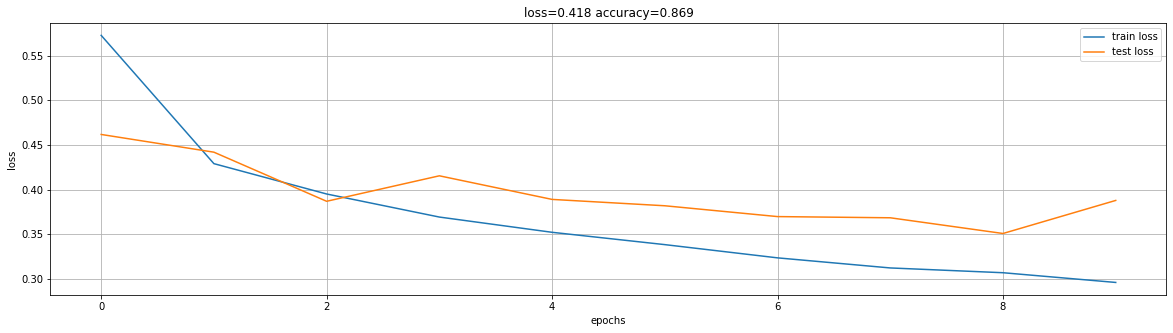

#8 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'adam', 'units': 128}


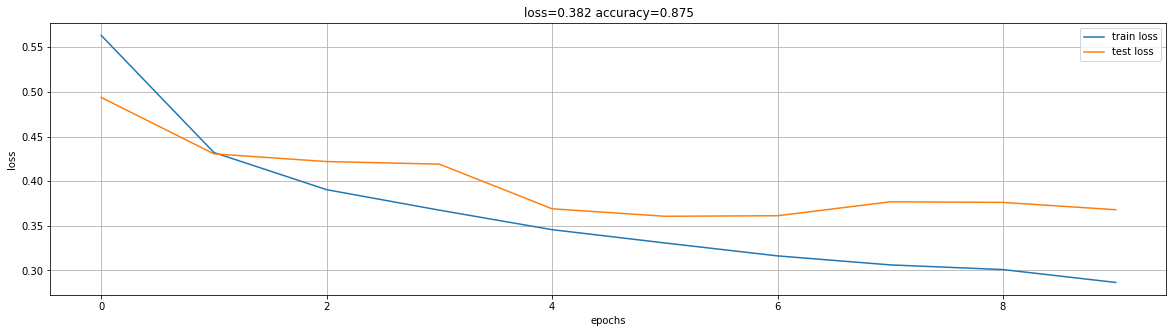

#9 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'sgd', 'units': 64}


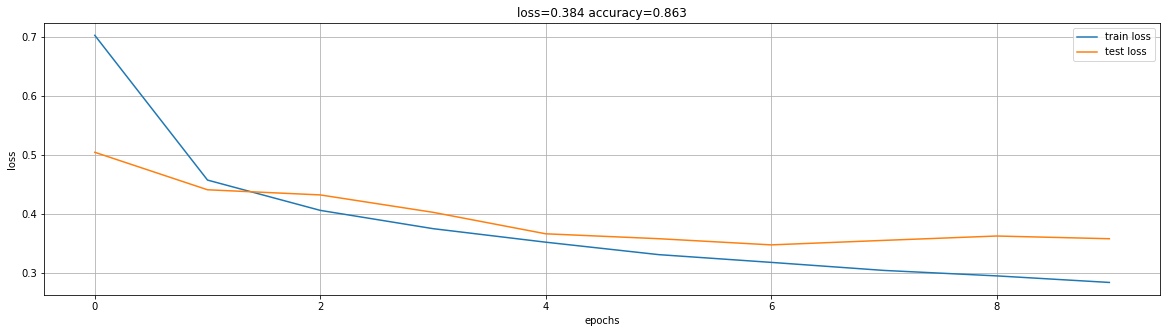

#10 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'sgd', 'units': 128}


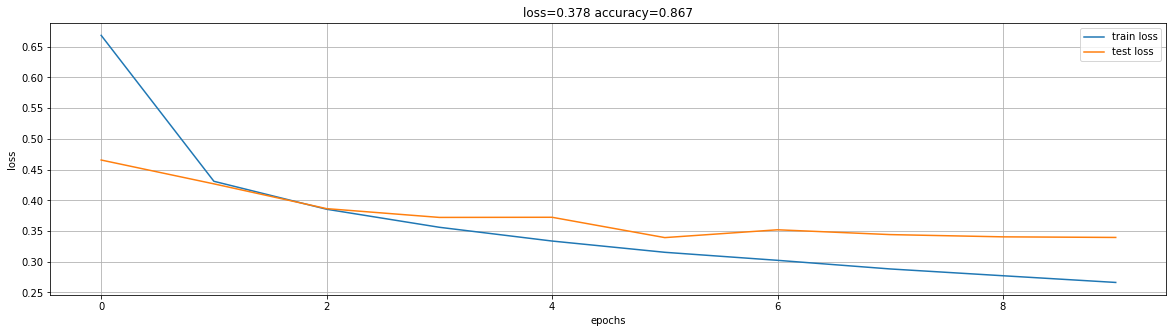

#11 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'rmsprop', 'units': 64}


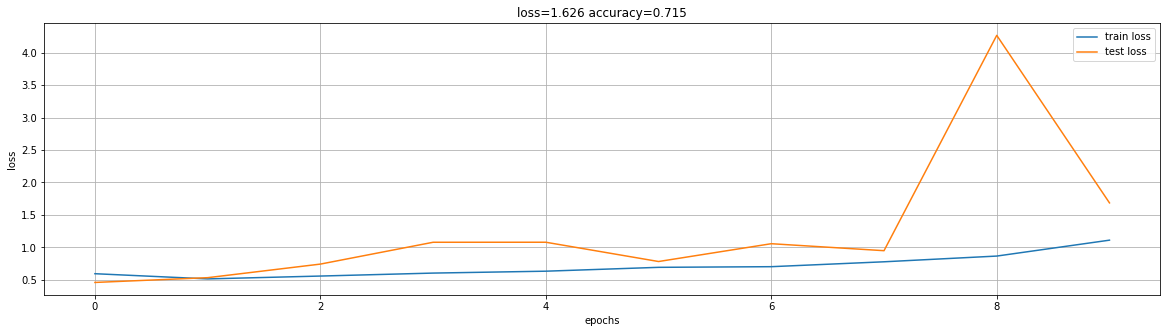

#12 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 5, 'optimizer': 'rmsprop', 'units': 128}


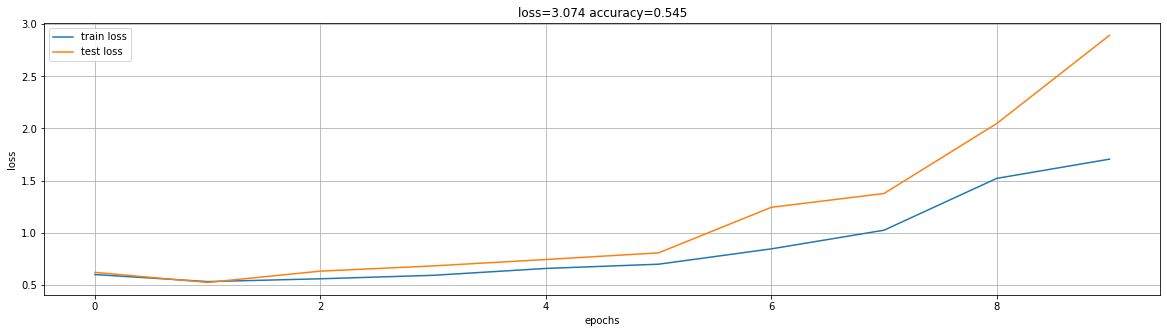

#13 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'adam', 'units': 64}


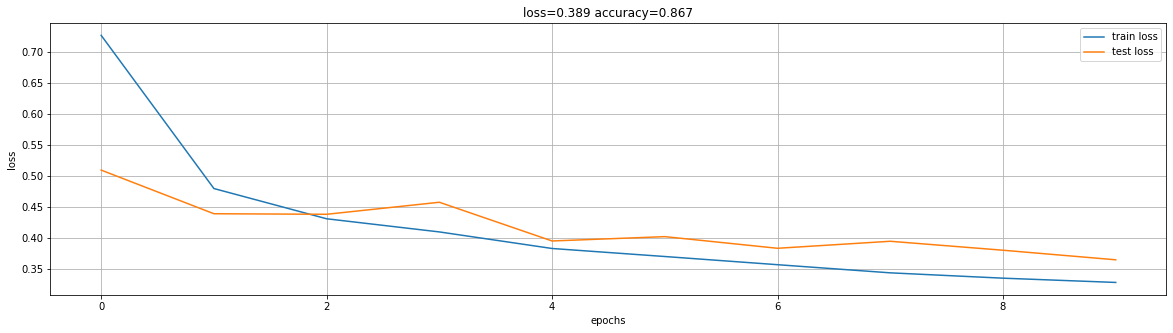

#14 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'adam', 'units': 128}


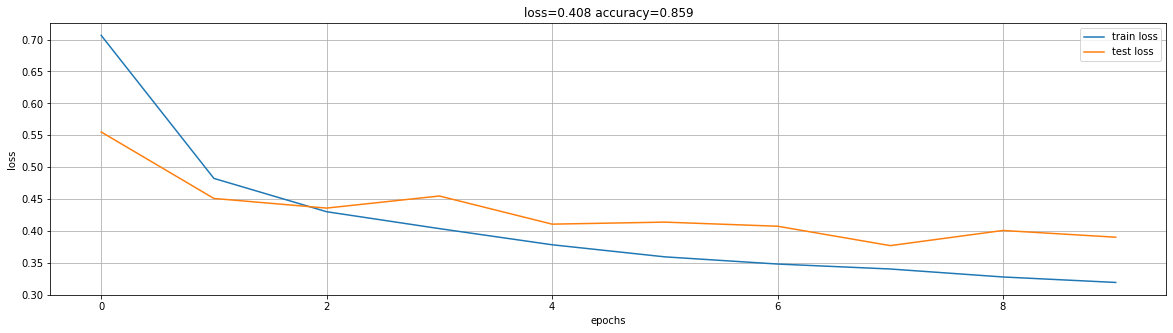

#15 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'sgd', 'units': 64}


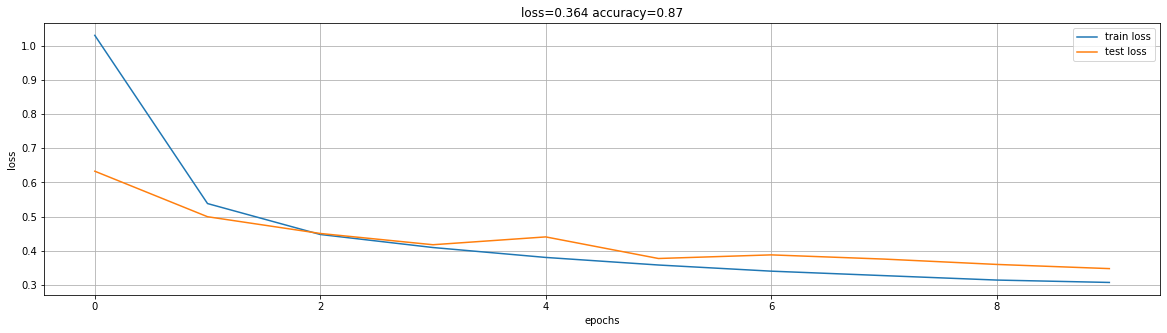

#16 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'sgd', 'units': 128}


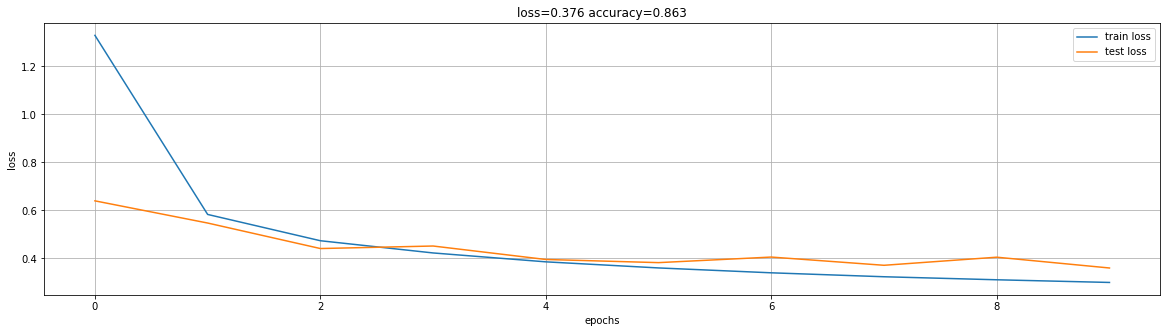

#17 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'rmsprop', 'units': 64}


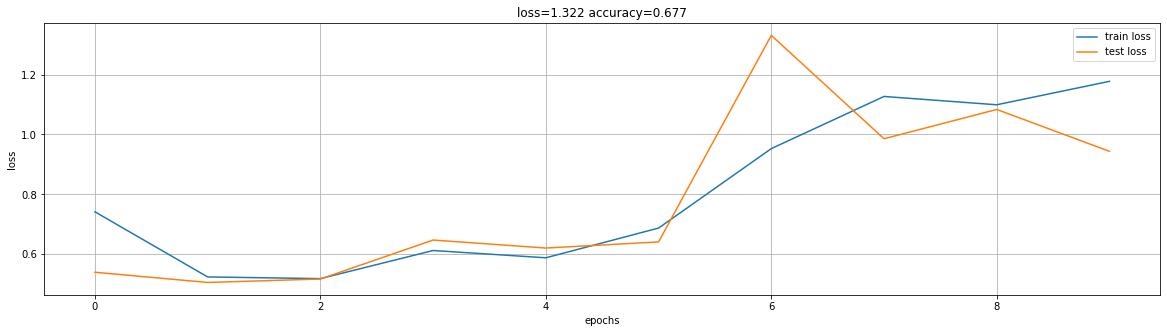

#18 from 18: {'batch_size': 16, 'epochs': 10, 'layers_num': 10, 'optimizer': 'rmsprop', 'units': 128}


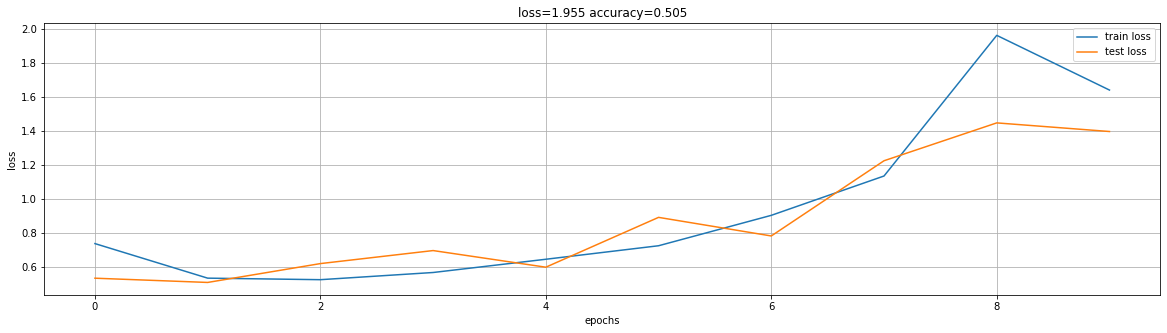

In [33]:
INPUT_SHAPE = (784,)

param_grid = {
    'units': [64, 128],
    'layers_num': [3, 5, 10],
    'optimizer': ['adam', 'sgd', 'rmsprop'],
    'batch_size': [16],
    'epochs': [10],
}

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

results: dict = dict()
grid: list = list(ParameterGrid(param_grid))
cnt: int = 0
for params in grid:
  cnt += 1
  print(f'#{cnt} from {len(grid)}: {params}')

  model = get_model(
    f'fashin_mnist_{cnt}',
    INPUT_SHAPE,
    params['units'],
    params['layers_num'],
    params['optimizer'],
  )
  
  # Train
  hh = model.fit(  
    train_images,
    y_train,
    epochs=params['epochs'],
    batch_size=params['batch_size'],
    validation_split=0.2,
    verbose=0,
  )

  # Evaluate
  result = model.evaluate(
    test_images,
    y_test,
    verbose=0,
  )

  results[cnt] = {
    'accuracy': result[1],
    'loss': result[0],
    'params': str(params)
  }

  plot(hh.history['loss'], hh.history['val_loss'], f'loss={round(result[0], 3)} accuracy={round(result[1], 3)}')

## Лучшие параметры

In [36]:
results_sorted = pd.DataFrame.from_dict(results, orient='index').sort_values(by='accuracy', ascending=False)
results_sorted.head(5)

,accuracy,loss,params
4,0.8755,0.349539,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."
8,0.8750,0.382420,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."
3,0.8741,0.345694,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."
15,0.8700,0.363728,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."
1,0.8692,0.380718,"{'batch_size': 16, 'epochs': 10, 'layers_num':..."


  {'batch_size': 16, 'epochs': 10, 'layers_num': 3, 'optimizer': 'sgd', 'units': 128}

## Обучение финальной модели

In [46]:
final_model = get_model(
  'fashin_mnist',
  INPUT_SHAPE,
  units=128,
  layers_num=3,
  optimizer='sgd',
)

final_model.fit(  
  train_images,
  y_train,
  epochs=15,
  batch_size=16,
  validation_split=0.2,
)

Epoch 1/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.8596 - accuracy: 0.6897 - val_loss: 0.5193 - val_accuracy: 0.8029
Epoch 2/15
3000/3000 [==============================] - 7s 2ms/step - loss: 0.4243 - accuracy: 0.8453 - val_loss: 0.3922 - val_accuracy: 0.8553
Epoch 3/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3858 - accuracy: 0.8585 - val_loss: 0.3765 - val_accuracy: 0.8643
Epoch 4/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3549 - accuracy: 0.8682 - val_loss: 0.3646 - val_accuracy: 0.8676
Epoch 5/15
3000/3000 [==============================] - 8s 3ms/step - loss: 0.3278 - accuracy: 0.8794 - val_loss: 0.3473 - val_accuracy: 0.8737
Epoch 6/15
3000/3000 [==============================] - 7s 2ms/step - loss: 0.3128 - accuracy: 0.8838 - val_loss: 0.3506 - val_accuracy: 0.8737
Epoch 7/15
3000/3000 [==============================] - 7s 2ms/step - loss: 0.2953 - accuracy: 0.8899 - val_loss: 0.3350 - val_accuracy:

## Валидация

In [47]:
  final_model.evaluate(
    test_images,
    y_test,
  )

313/313 [==============================] - 1s 3ms/step - loss: 0.3424 - accuracy: 0.8805


[0.342425674200058, 0.8805000185966492]

In [59]:
y_test_pred = final_model.predict(test_images)
y_test_pred = np.argmax(y_test_pred, axis=1)

print(classification_report(test_labels, y_test_pred))

              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1000
           1       0.96      0.98      0.97      1000
           2       0.78      0.81      0.79      1000
           3       0.91      0.85      0.88      1000
           4       0.80      0.84      0.82      1000
           5       0.96      0.95      0.96      1000
           6       0.72      0.67      0.69      1000
           7       0.94      0.94      0.94      1000
           8       0.96      0.96      0.96      1000
           9       0.94      0.96      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



## Вывод

